In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data  = pd.read_csv('data.csv')
data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,...,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,...,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,...,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,...,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,...,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city


In [3]:
sample_data = pd.read_csv('sample dataset.csv')
sample_data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,...,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,...,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,...,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,...,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,...,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city


In [4]:
sample_sub = pd.read_csv('sample submission.csv')
sample_sub

,user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500
0,fffe3100,0.0,1,88.3,0.0,56.4
1,fffe3200,0.0,0,0.0,64.1,0.0
2,fffe3300,23.0,0,0.0,0.0,99.9
3,fffe3400,0.0,0,0.0,0.0,0.0
4,fffe3500,54.3,0,55.0,0.0,0.0


In [5]:
data.nunique()

user_id                2001
username               1995
age                      52
status                    4
sex                       2
orientation               3
drinks                    6
drugs                     3
height                   25
job                      21
location                 70
pets                     15
smokes                    5
language                575
new_languages             3
body_profile             12
education_level           5
dropped_out               2
bio                    2001
interests                31
other_interests          31
location_preference       3
dtype: int64

In [6]:
data.describe()

,age,height,education_level
count,2001.000000,2001.000000,2001.000000
mean,33.072464,68.289855,2.932534
std,10.483189,3.895246,0.812371
min,18.000000,55.000000,1.000000
25%,26.000000,65.000000,2.000000
50%,30.000000,68.000000,3.000000
75%,39.000000,71.000000,3.000000
max,69.000000,83.000000,5.000000


In [7]:
data['location_preference'].unique()

array(['same state', 'anywhere', 'same city'], dtype=object)

In [8]:
data['username'].isnull().sum()

0

In [9]:
df1 = data.groupby("drinks")["age"].sum()
df1


drinks
desperately      291
not at all      5422
often           4953
rarely          9072
socially       45945
very often       495
Name: age, dtype: int64

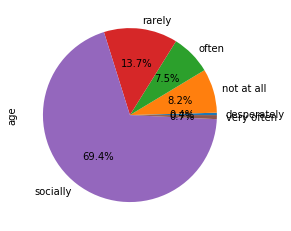

In [10]:
df1.plot.pie(autopct="%.1f%%")


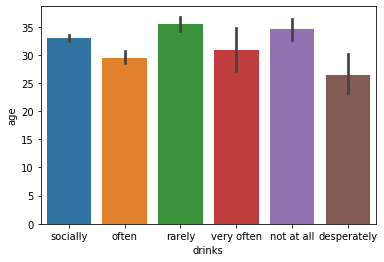

In [12]:
sns.barplot(y = data['age'], x = data['drinks'])

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
LE = LabelEncoder() 

In [15]:
data['username'] = LE.fit_transform(data['username']) 
data['location'] = LE.fit_transform(data['location'])
data['language'] = LE.fit_transform(data['language'])
data['bio'] = LE.fit_transform(data['bio'])

In [16]:
def status():
    global data
    data['status']  = data['status'].map({'single':0, 'seeing someone':2, 'married':3, 'available':1})
    
    
def sex():
    global data
    data['sex'] = data['sex'].map({ 'f': 0, 'm': 1 })
    
    
def orientation():
    global data
    data['orientation'] = data['orientation'].map({ 'gay':1, 'bisexual':2, 'straight':0 })
    
def drinks():
    global data
    data['drinks'] = data['drinks'].map({'socially':4, 'often':3, 'rarely':2, 'very often':1, 'not at all': 0, 'desperately':5 })

def drugs():
    global data
    data['drugs'] = data['drugs'].map({'never':0, 'sometimes':1, 'often':2})
    
def job():
    global data
    data['job'] = data['job'].map({'medicine / health':0, 'other':16, 'computer / hardware / software':1,
       'artistic / musical / writer':2, 'banking / financial / real estate':3,
       'education / academia':4, 'political / government':5, 'student':17,
       'entertainment / media':6, 'law / legal services':7,
       'hospitality / travel':8, 'clerical / administrative':9, 'unemployed':18,
       'transportation':10, 'science / tech / engineering':11, 'retired':20,
       'construction / craftsmanship':12, 'sales / marketing / biz dev':13,
       'executive / management':14, 'rather not say':19, 'military':15})
    
def pets():
    global data
    data['pets'] = data['pets'].map({'likes dogs and likes cats':0, 'likes dogs':1,
       'has dogs and likes cats':2, 'has dogs':3,
       'dislikes dogs and dislikes cats':4, 'has cats':5,
       'likes dogs and dislikes cats':6, 'likes dogs and has cats':7,
       'has dogs and has cats':8, 'likes cats':9,
       'dislikes dogs and likes cats':10, 'dislikes cats':11, 'dislikes dogs':12,
       'has dogs and dislikes cats':13, 'dislikes dogs and has cats':14})
    
def smokes():
    global data
    data['smokes'] = data['smokes'].map({'no':0, 'sometimes':2, 'yes':1, 'when drinking':3, 'trying to quit':4})
    
def new_language():
    global data
    data['new_languages'] = data['new_languages'].map({'interested':1, 'not interested':0, 'somewhat interested':2})
    
def body_profile():
    global data
    data['body_profile'] = data['body_profile'].map({'athletic':0, 'fit':1, 'average':2, 'skinny':3, 'curvy':4, 'a little extra':5,
       'used up':6, 'thin':7, 'jacked':8, 'full figured':9, 'overweight':10,
       'rather not say':11})
    
def drop_out():
    global data
    data['dropped_out'] = data['dropped_out'].map({'no':0, 'yes':1})
    
def interest():
    global data
    data['interests'] = data['interests'].map({'sports':0, 'painting':1, 'instruments':3, 'sketching':4, 'craft':5,
       'video games':6, 'photography':7, 'designing':8, 'dancing':9, 'writting':10,
       'singing':11, 'food':12, 'makeup':13, 'astronomy':14, 'organising events':15,
       'music':16, 'reading':17, 'politics':18, 'studying':19, 'diy':20, 'yoga':21,
       'travelling':22, 'gardening':23, 'social_networking':24, 'movies':25,
       'collectibles':26, 'acting':27, 'cooking':28, 'calligraphy':29, 'fishing':30,
       'camping':2})
    
def other_interest():
    global data
    data['other_interests'] = data['other_interests'].map({'instruments':0, 'dancing':1, 'acting':2, 'designing':3, 'collectibles':4,
       'movies':5, 'sports':6, 'yoga':7, 'diy':8, 'craft':9, 'sketching':10, 'music':11,
       'gardening':12, 'singing':13, 'photography':14, 'astronomy':15, 'fishing':16,
       'studying':17, 'social_networking':18, 'video games':19, 'writting':20,
       'painting':21, 'cooking':22, 'reading':23, 'calligraphy':24, 'food':25,
       'organising events':26, 'politics':27, 'makeup':28, 'travelling':29, 'camping':30})
    
def location_pref():
    global data
    data['location_preference'] = data['location_preference'].map({'same state':0, 'anywhere':1, 'same city':2})
    
    
    
    

In [17]:
status()
sex()
orientation()
drugs()
job()
pets()
smokes()
new_language()
body_profile()
drop_out()
interest()
other_interest()
location_pref()

In [18]:
data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,505,27,0,0,1,socially,0,66.0,0,...,0,398,1,0,4.0,0,172,0,0,0
1,fffe3200,1881,26,0,1,1,socially,0,68.0,16,...,0,411,1,1,3.0,0,1172,1,0,1
2,fffe3300,12,20,2,0,2,socially,1,69.0,16,...,2,297,1,1,2.0,0,1591,3,1,2
3,fffe3400,1707,27,0,1,2,socially,1,68.0,1,...,0,0,0,2,3.0,0,1171,4,2,2
4,fffe3500,530,22,0,0,2,often,1,68.0,16,...,1,0,0,2,2.0,1,1981,5,3,2


In [19]:
drinks()

In [20]:
data['height'] = data['height'].astype(int)

In [21]:
data

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,505,27,0,0,1,4,0,66,0,...,0,398,1,0,4.0,0,172,0,0,0
1,fffe3200,1881,26,0,1,1,4,0,68,16,...,0,411,1,1,3.0,0,1172,1,0,1
2,fffe3300,12,20,2,0,2,4,1,69,16,...,2,297,1,1,2.0,0,1591,3,1,2
3,fffe3400,1707,27,0,1,2,4,1,68,1,...,0,0,0,2,3.0,0,1171,4,2,2
4,fffe3500,530,22,0,0,2,3,1,68,16,...,1,0,0,2,2.0,1,1981,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,fffe3100390039003700,1563,24,0,1,0,4,0,69,17,...,1,0,0,2,2.0,0,764,5,23,2
1997,fffe3100390039003800,1104,23,0,0,1,4,0,68,13,...,0,0,0,0,2.0,0,1455,13,2,0
1998,fffe3100390039003900,357,28,0,1,0,2,0,71,13,...,0,0,0,0,3.0,0,1440,11,27,1
1999,fffe3200300030003000,1626,32,2,1,0,0,0,68,16,...,0,216,2,7,3.0,0,656,16,22,2


In [22]:
'''columns = data.user_id
columns'''

'columns = data.user_id\ncolumns'

In [23]:
data = data.set_index(data['user_id'])
'''data  =  data.drop('user_id', axis = 1)'''

"data  =  data.drop('user_id', axis = 1)"

In [24]:
data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3100,fffe3100,505,27,0,0,1,4,0,66,0,...,0,398,1,0,4.0,0,172,0,0,0
fffe3200,fffe3200,1881,26,0,1,1,4,0,68,16,...,0,411,1,1,3.0,0,1172,1,0,1
fffe3300,fffe3300,12,20,2,0,2,4,1,69,16,...,2,297,1,1,2.0,0,1591,3,1,2
fffe3400,fffe3400,1707,27,0,1,2,4,1,68,1,...,0,0,0,2,3.0,0,1171,4,2,2
fffe3500,fffe3500,530,22,0,0,2,3,1,68,16,...,1,0,0,2,2.0,1,1981,5,3,2


In [25]:
df= data

In [26]:
df = df.drop('user_id', axis = 1 )
df

,username,age,status,sex,orientation,drinks,drugs,height,job,location,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3100,505,27,0,0,1,4,0,66,0,40,...,0,398,1,0,4.0,0,172,0,0,0
fffe3200,1881,26,0,1,1,4,0,68,16,47,...,0,411,1,1,3.0,0,1172,1,0,1
fffe3300,12,20,2,0,2,4,1,69,16,40,...,2,297,1,1,2.0,0,1591,3,1,2
fffe3400,1707,27,0,1,2,4,1,68,1,14,...,0,0,0,2,3.0,0,1171,4,2,2
fffe3500,530,22,0,0,2,3,1,68,16,40,...,1,0,0,2,2.0,1,1981,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,1563,24,0,1,0,4,0,69,17,40,...,1,0,0,2,2.0,0,764,5,23,2
fffe3100390039003800,1104,23,0,0,1,4,0,68,13,55,...,0,0,0,0,2.0,0,1455,13,2,0
fffe3100390039003900,357,28,0,1,0,2,0,71,13,47,...,0,0,0,0,3.0,0,1440,11,27,1


In [27]:
df.shape

(2001, 21)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(df)

In [29]:
sim

array([[1.        , 0.87400941, 0.37229335, ..., 0.43662744, 0.86594219,
        0.78108635],
       [0.87400941, 1.        , 0.55161541, ..., 0.70588523, 0.98326578,
        0.95995141],
       [0.37229335, 0.55161541, 1.        , ..., 0.95580879, 0.39588419,
        0.75932083],
       ...,
       [0.43662744, 0.70588523, 0.95580879, ..., 1.        , 0.58334094,
        0.87423255],
       [0.86594219, 0.98326578, 0.39588419, ..., 0.58334094, 1.        ,
        0.8974884 ],
       [0.78108635, 0.95995141, 0.75932083, ..., 0.87423255, 0.8974884 ,
        1.        ]])

In [30]:
simi = sim*100
simi

array([[100.        ,  87.40094086,  37.22933475, ...,  43.66274394,
         86.59421895,  78.10863517],
       [ 87.40094086, 100.        ,  55.16154101, ...,  70.58852293,
         98.32657758,  95.99514126],
       [ 37.22933475,  55.16154101, 100.        , ...,  95.58087938,
         39.58841867,  75.93208332],
       ...,
       [ 43.66274394,  70.58852293,  95.58087938, ..., 100.        ,
         58.33409404,  87.42325486],
       [ 86.59421895,  98.32657758,  39.58841867, ...,  58.33409404,
        100.        ,  89.74884033],
       [ 78.10863517,  95.99514126,  75.93208332, ...,  87.42325486,
         89.74884033, 100.        ]])

In [31]:
index_values = list(data['user_id'])
column_values =list(data['user_id'])
df_to_submit = pd.DataFrame(data = simi, columns=column_values, index = index_values )

In [32]:
df_to_submit.index.name = 'user_id'
#df_to_submit = df_to_submit.set_index(list(data['user_id']))

In [33]:
#modified = df_to_submit.reset_index(level='user_id')

In [34]:
df_to_submit

,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,...,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3100,100.000000,87.400941,37.229335,76.973275,44.688931,62.042313,52.845886,53.100569,66.394633,78.369851,...,82.085320,57.286963,77.260541,64.134294,77.034079,79.399576,66.463548,43.662744,86.594219,78.108635
fffe3200,87.400941,100.000000,55.161541,98.217875,71.841098,88.302764,79.627180,80.076702,85.919111,85.831669,...,95.881181,80.343639,98.012221,90.015123,98.170089,97.796933,91.871438,70.588523,98.326578,95.995141
fffe3300,37.229335,55.161541,100.000000,56.280030,95.155073,83.827443,91.354705,91.073187,89.916138,86.549442,...,75.687323,93.023773,65.293510,81.593188,57.067634,43.972892,78.807524,95.580879,39.588419,75.932083
fffe3400,76.973275,98.217875,56.280030,100.000000,75.983881,91.644680,83.448724,83.898280,86.453967,81.667433,...,94.317272,82.524399,99.297562,93.214382,99.937060,98.901781,94.887586,74.754240,96.865815,95.851310
fffe3500,44.688931,71.841098,95.155073,75.983881,100.000000,95.647327,99.180412,99.117158,96.511312,88.809828,...,86.452657,98.888301,82.297637,94.329020,76.568775,65.704932,92.587134,99.946246,59.736571,88.246572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,79.399576,97.796933,43.972892,98.901781,65.704932,84.822596,74.577202,75.074487,78.622920,74.871289,...,90.145351,73.530194,96.719530,86.957074,98.770803,100.000000,89.305389,64.351693,98.994158,91.379572
fffe3100390039003800,66.463548,91.871438,78.807524,94.887586,92.587134,99.565111,96.548220,96.754819,96.979767,90.517676,...,96.758242,95.826480,97.571443,99.862087,95.185207,89.305389,100.000000,91.872579,85.249231,98.438396
fffe3100390039003900,43.662744,70.588523,95.580879,74.754240,99.946246,95.056085,98.958418,98.834320,96.098255,88.432330,...,85.788452,98.647835,81.253150,93.694112,75.413072,64.351693,91.872579,100.000000,58.334094,87.423255


In [35]:
df_to_submit.to_csv('submisstion_file.csv')

In [36]:
df_to_submit.shape

(2001, 2001)